# Business Question 2:
How can we use **historical weather and consumption data** to **predict and optimize energy distribution** year-round? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataframe

This dataframe was merged using q2-etl.py. 

Datasets merged:
- df1 daily_dataset.zip - block files of a household's daily energy consumption
- df7 uk_bank_holidays.csv 
- df8 weather_daily_darksky.csv

In [2]:
df = pd.read_csv('q2_daily_energy_weather.csv')
df.head(5)

,lclid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,temperaturemax,...,is_weekend,is_holiday,temp_variation,temp_humidity_interaction,temp_cloudcover_interaction,temp_uvindex_interaction,weekend_energy_interaction,holiday_energy_interaction,daylight_duration,temp_daylight_interaction
0,MAC000363,1386201600000000000,0.0505,0.078833,0.397,48,0.078536,3.784,0.012,10.29,...,False,0,9.21,7.5117,4.5276,10.29,0.000000,0.0,8.066667,83.006000
1,MAC000363,1386288000000000000,0.0415,0.073458,0.725,48,0.117885,3.526,0.008,7.85,...,False,0,5.12,5.4950,2.9830,7.85,0.000000,0.0,8.050000,63.192500
2,MAC000363,1386374400000000000,0.0650,0.083479,0.431,48,0.080437,4.007,0.008,8.72,...,True,0,2.17,7.4120,4.0984,8.72,0.083479,0.0,8.000000,69.760000
3,MAC000363,1386460800000000000,0.0485,0.065979,0.382,48,0.065583,3.167,0.008,11.24,...,True,0,6.15,9.3292,3.9340,11.24,0.065979,0.0,7.983333,89.732667
4,MAC000363,1386547200000000000,0.0325,0.050458,0.399,48,0.062031,2.422,0.008,11.01,...,False,0,5.95,9.7989,3.5232,11.01,0.000000,0.0,7.966667,87.713000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465258 entries, 0 to 3465257
Data columns (total 55 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   lclid                        object 
 1   day                          int64  
 2   energy_median                float64
 3   energy_mean                  float64
 4   energy_max                   float64
 5   energy_count                 int64  
 6   energy_std                   float64
 7   energy_sum                   float64
 8   energy_min                   float64
 9   temperaturemax               float64
 10  temperaturemaxtime           object 
 11  windbearing                  float64
 12  icon                         object 
 13  dewpoint                     float64
 14  temperaturemintime           object 
 15  cloudcover                   float64
 16  windspeed                    float64
 17  pressure                     float64
 18  apparenttemperaturemintime   object 
 19  

Data cleaning was done to impute null values

In [4]:
df.isnull().sum()

lclid                          0
day                            0
energy_median                  0
energy_mean                    0
energy_max                     0
energy_count                   0
energy_std                     0
energy_sum                     0
energy_min                     0
temperaturemax                 0
temperaturemaxtime             0
windbearing                    0
icon                           0
dewpoint                       0
temperaturemintime             0
cloudcover                     0
windspeed                      0
pressure                       0
apparenttemperaturemintime     0
apparenttemperaturehigh        0
preciptype                     0
visibility                     0
humidity                       0
apparenttemperaturehightime    0
apparenttemperaturelow         0
apparenttemperaturemax         0
uvindex                        0
time                           0
sunsettime                     0
temperaturelow                 0
temperatur

# Identifying variables to include in ML model

Insights:
- Drop **energy_std** as 3.5% (200/57218) of values are missing

In [5]:
df = df.drop('energy_std', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465258 entries, 0 to 3465257
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   lclid                        object 
 1   day                          int64  
 2   energy_median                float64
 3   energy_mean                  float64
 4   energy_max                   float64
 5   energy_count                 int64  
 6   energy_sum                   float64
 7   energy_min                   float64
 8   temperaturemax               float64
 9   temperaturemaxtime           object 
 10  windbearing                  float64
 11  icon                         object 
 12  dewpoint                     float64
 13  temperaturemintime           object 
 14  cloudcover                   float64
 15  windspeed                    float64
 16  pressure                     float64
 17  apparenttemperaturemintime   object 
 18  apparenttemperaturehigh      float64
 19  

Goal: include features that are likely to have a meaningful relationship with the target variable (energy_mean) based on domain knowledge and exploratory data analysis (EDA).

## 1. Domain Knowledge

Factors that are likely to influence household energy consumption:

- Weather-related variables: Temperature, humidity, wind speed, cloud cover, pressure, etc., directly impact heating/cooling systems.

- Time-related variables: Day, sunrise/sunset times, moon phase, etc., may influence energy usage patterns.

## 2. EDA Insights

### 2a. Distribution of Target Variable (energy_mean)

In [6]:
df['energy_mean'].describe()

count    3.465258e+06
mean     2.117635e-01
std      1.903000e-01
min      0.000000e+00
25%      9.820833e-02
50%      1.633958e-01
75%      2.625000e-01
max      6.928250e+00
Name: energy_mean, dtype: float64

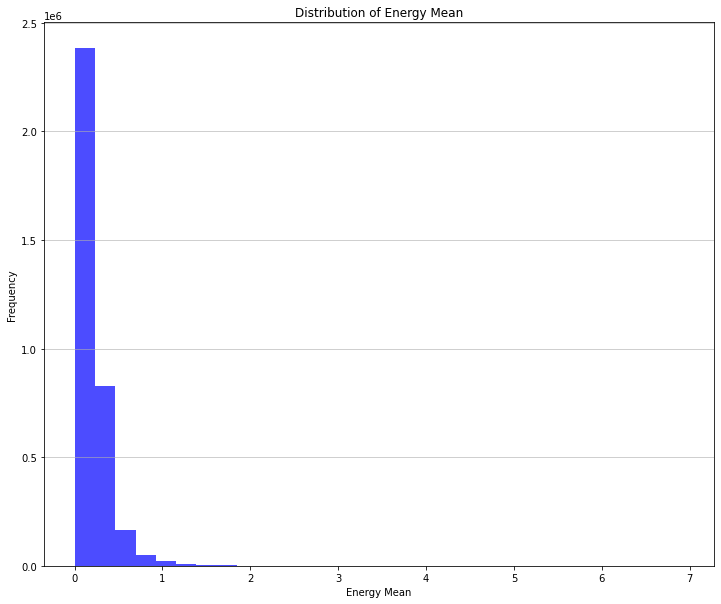

In [7]:
# Plot histogram for 'energy_mean'
plt.figure(figsize=(12, 10))
plt.hist(df['energy_mean'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Energy Mean')
plt.xlabel('Energy Mean')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

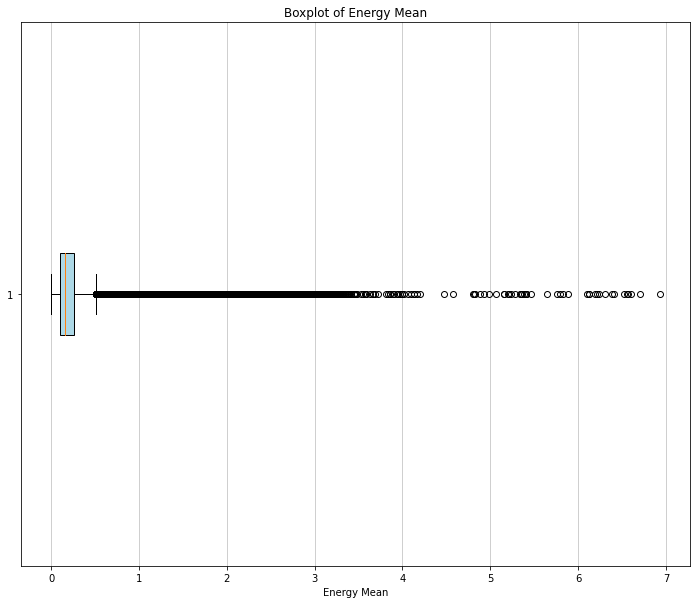

In [8]:
# Plot boxplot for 'energy_mean'
plt.figure(figsize=(12, 10))
plt.boxplot(df['energy_mean'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Energy Mean')
plt.xlabel('Energy Mean')
plt.grid(axis='x', alpha=0.75)
plt.show()

Insights: 
- Most of the energy consumption values are concentrated near the lower end of the scale, close to 0
- Whiskers extend to data points within 1.5 times the IQR --> variability in energy consumption
- Several extreme outliers on the higher end (values > 1), with some reaching as high as ~5
- Positive skew --> small number of households consume significantly more energy than others

### 2b. Distribution of numeric features

In [9]:
numeric_cols = df.select_dtypes(include=['number'])
numeric_cols.columns.tolist()

['day',
 'energy_median',
 'energy_mean',
 'energy_max',
 'energy_count',
 'energy_sum',
 'energy_min',
 'temperaturemax',
 'windbearing',
 'dewpoint',
 'cloudcover',
 'windspeed',
 'pressure',
 'apparenttemperaturehigh',
 'visibility',
 'humidity',
 'apparenttemperaturelow',
 'apparenttemperaturemax',
 'uvindex',
 'sunsettime',
 'temperaturelow',
 'temperaturemin',
 'temperaturehigh',
 'sunrisetime',
 'apparenttemperaturemin',
 'moonphase',
 'is_holiday',
 'temp_variation',
 'temp_humidity_interaction',
 'temp_cloudcover_interaction',
 'temp_uvindex_interaction',
 'weekend_energy_interaction',
 'holiday_energy_interaction',
 'daylight_duration',
 'temp_daylight_interaction']

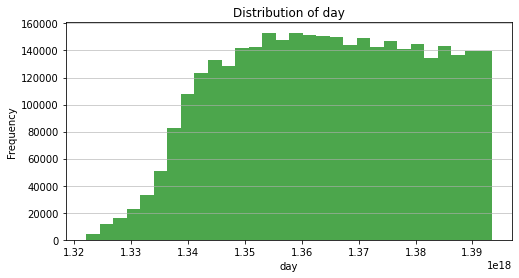

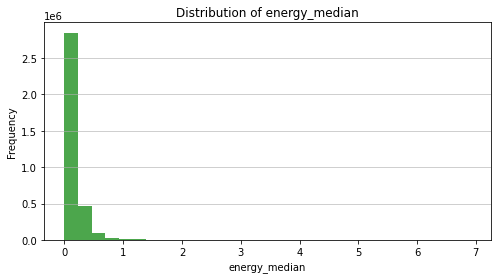

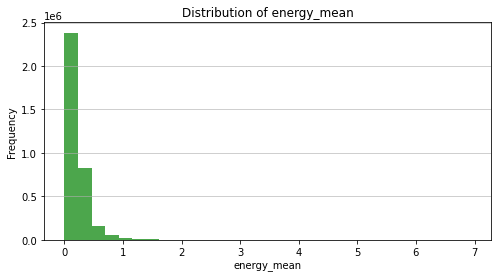

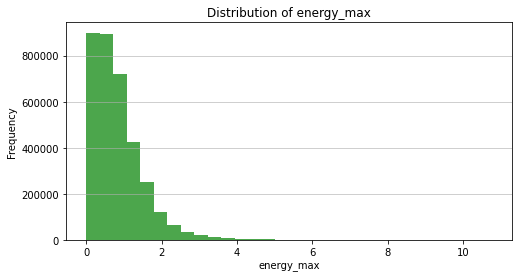

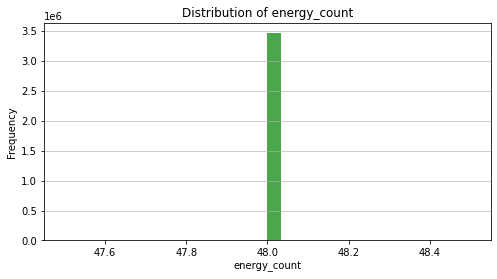

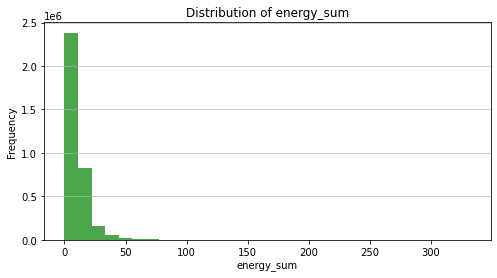

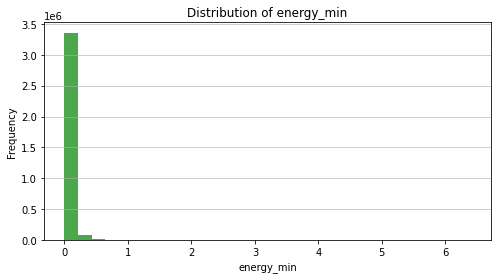

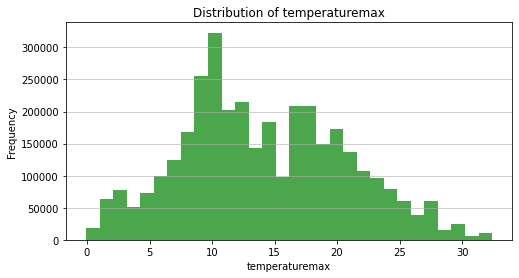

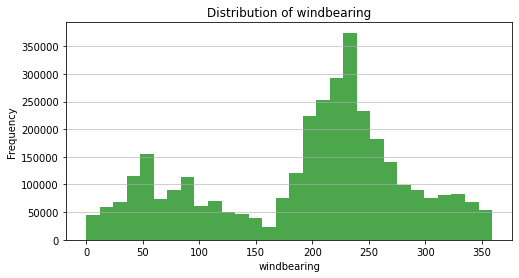

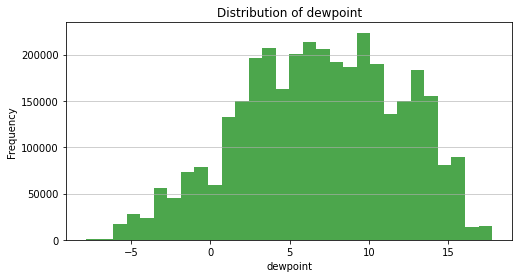

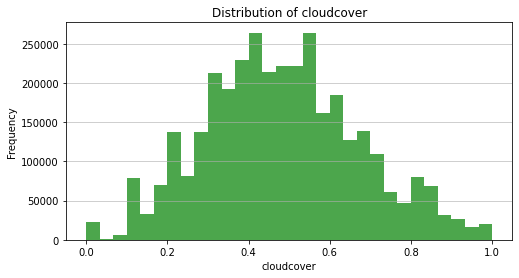

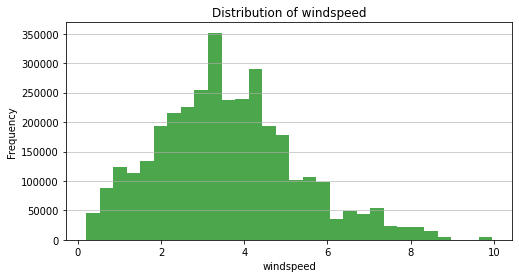

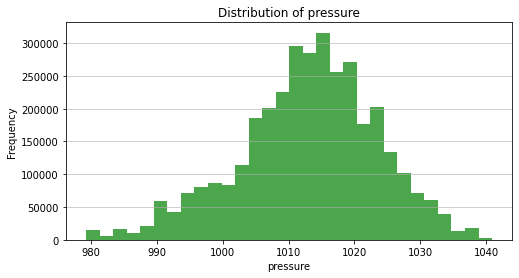

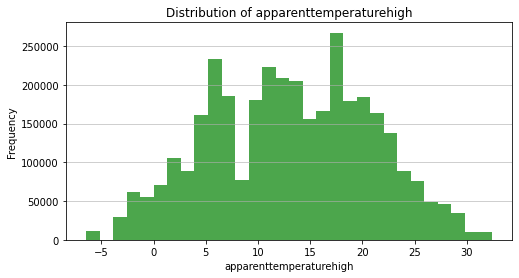

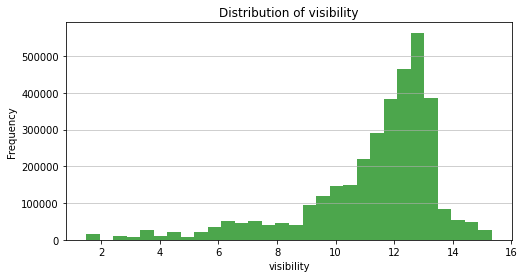

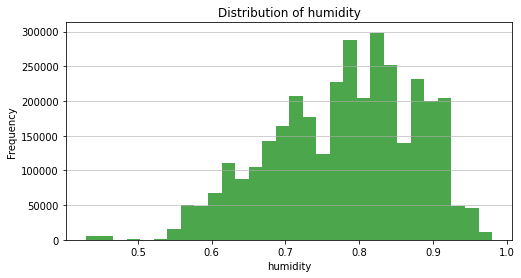

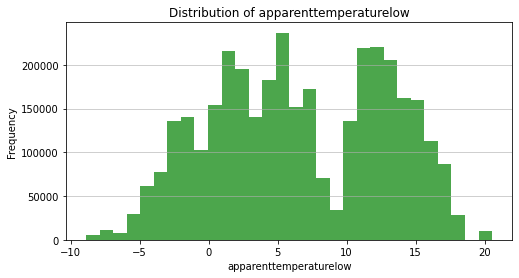

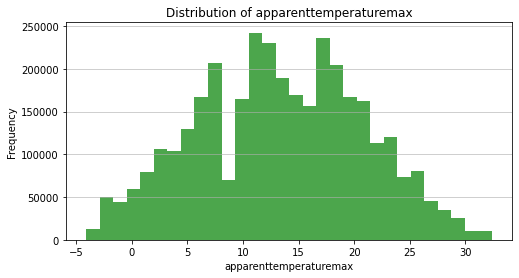

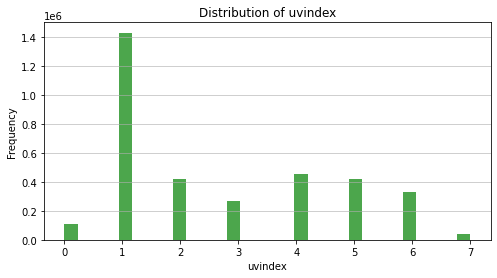

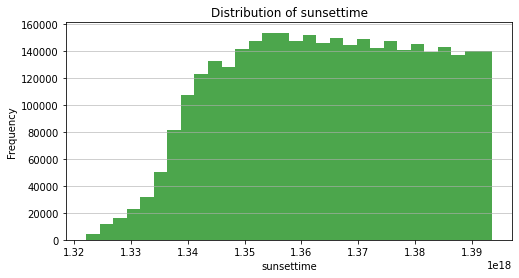

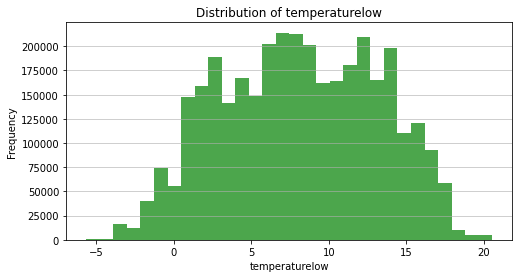

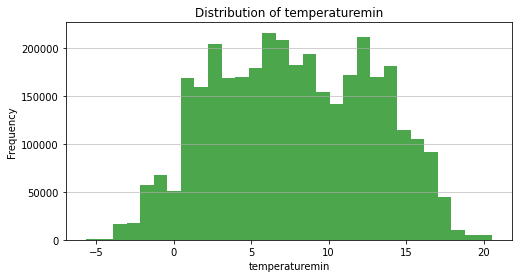

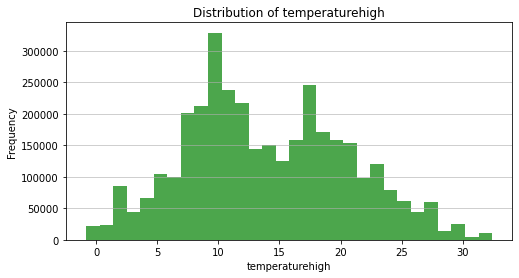

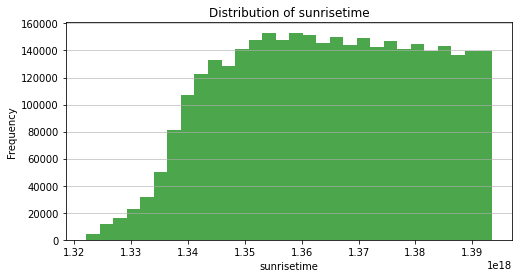

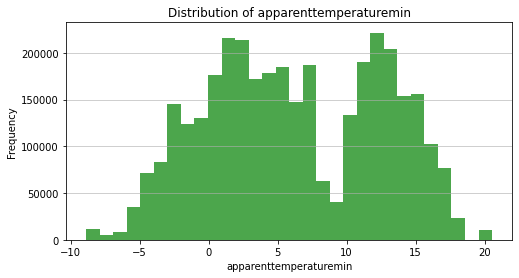

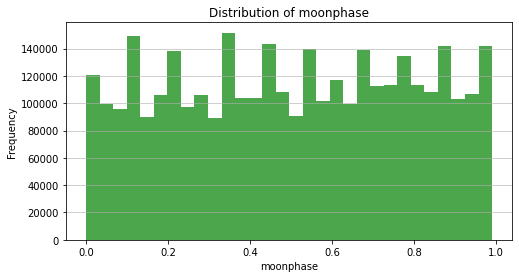

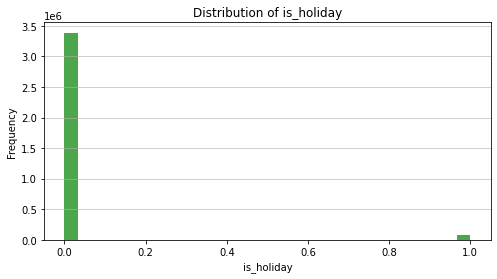

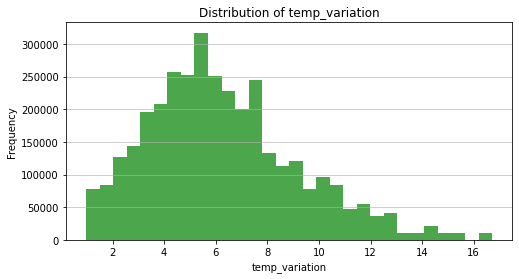

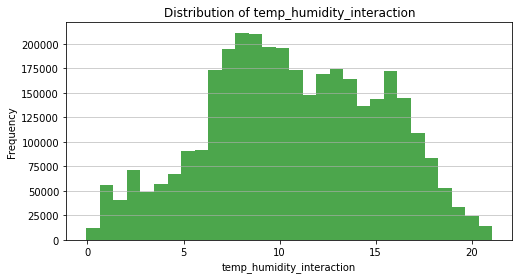

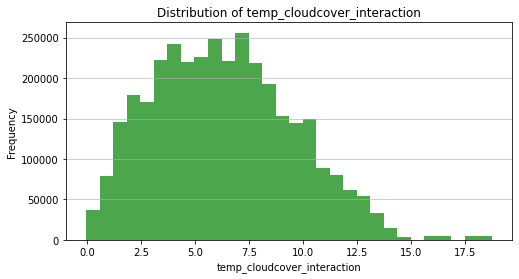

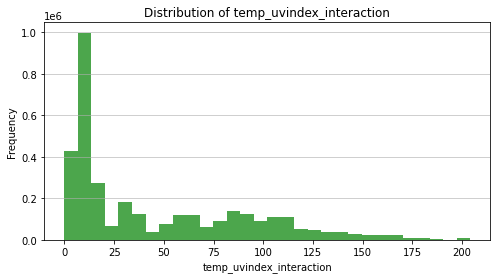

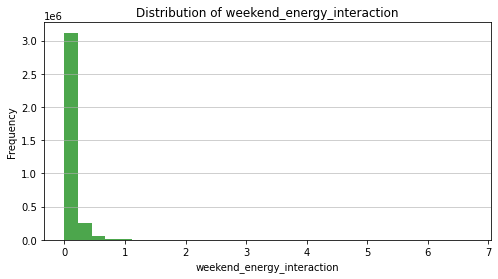

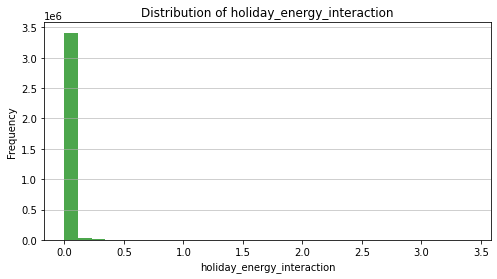

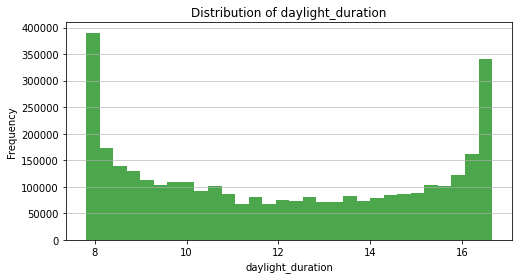

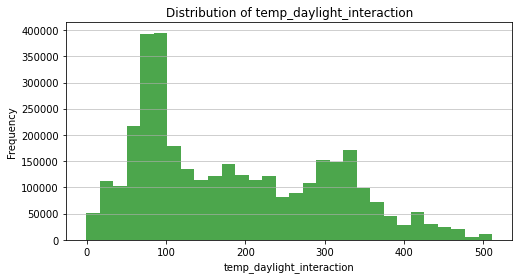

In [10]:
# Histogram for numeric columns
for feature in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[feature].dropna(), bins=30, color='green', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

Insights: 
- energy_count is just use
- Bimodal shape of temperatureMax suggests seasonal trends that could be modeled explicitly (e.g., adding month or season as a feature).

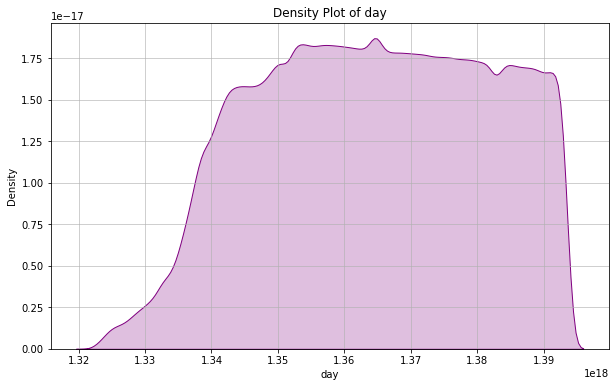

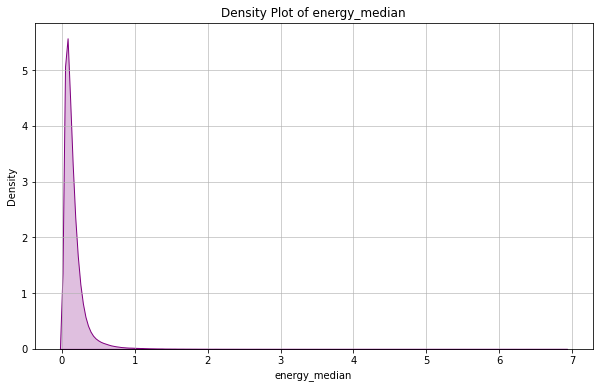

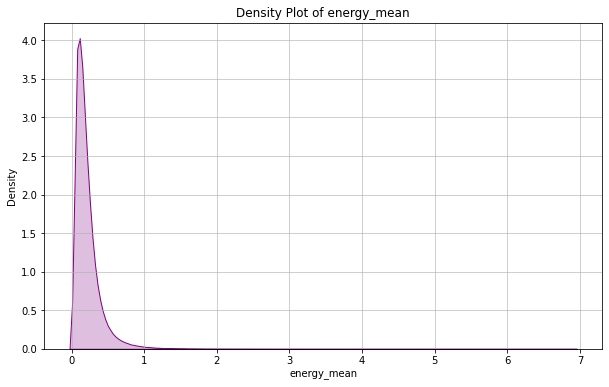

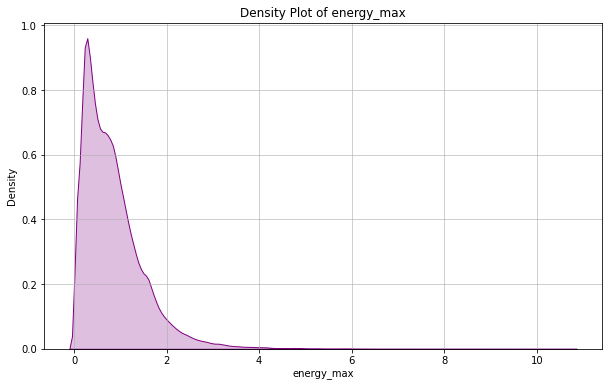

C:\Users\chloe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


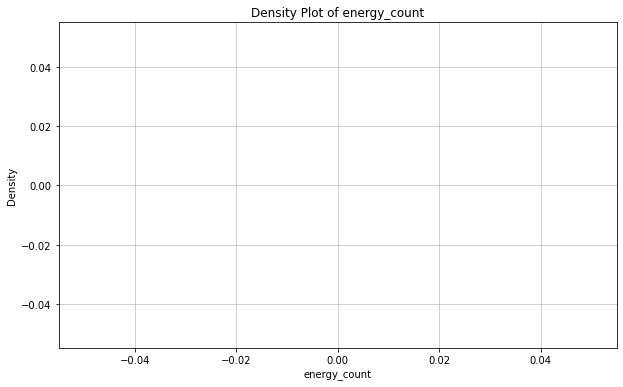

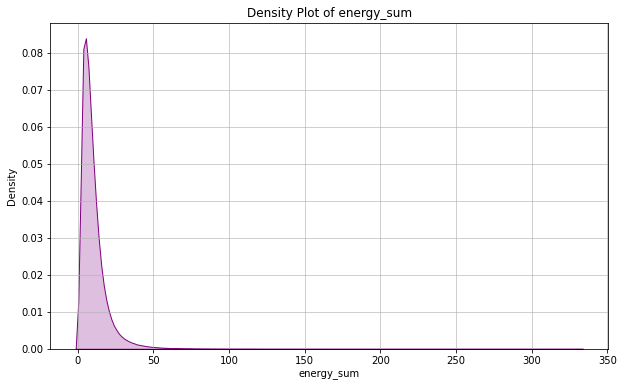

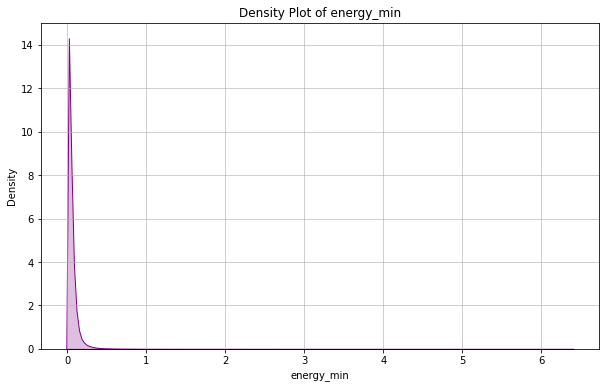

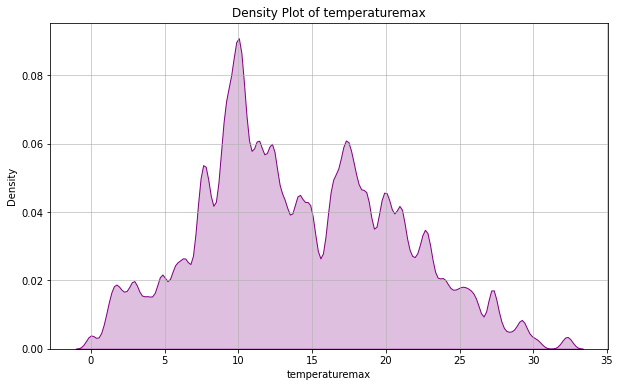

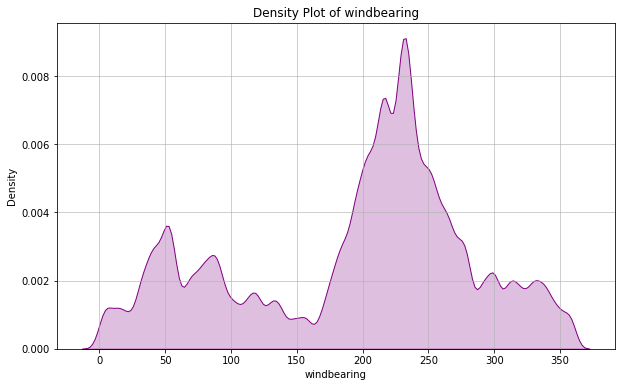

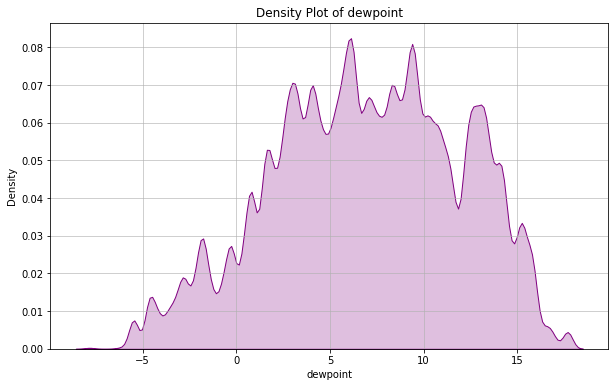

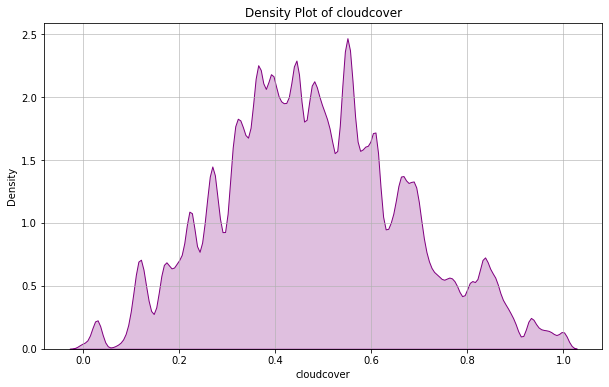

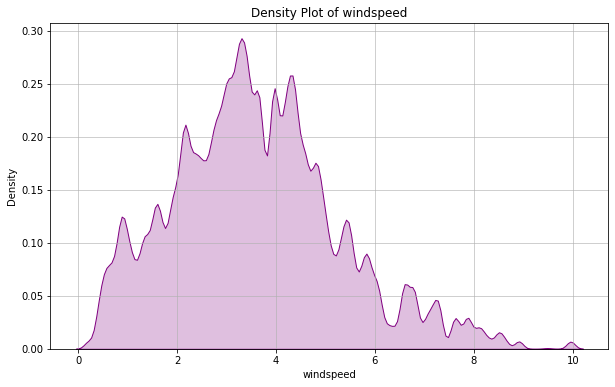

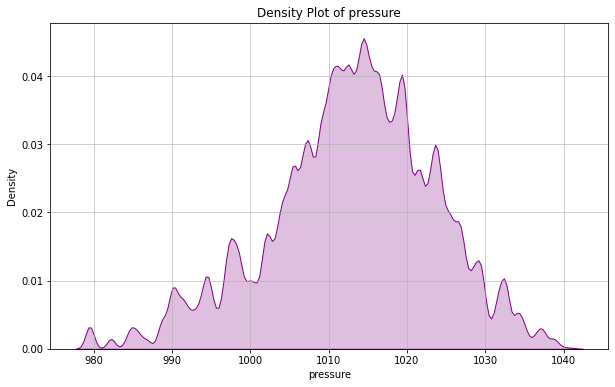

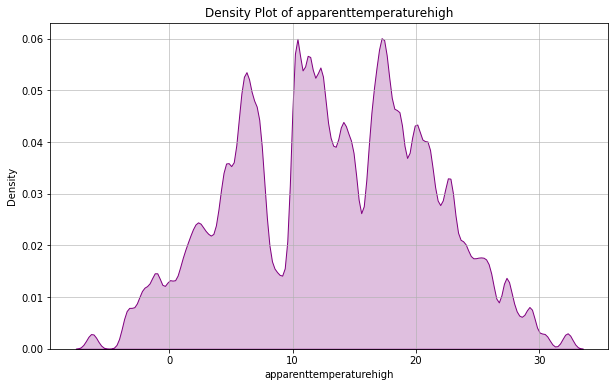

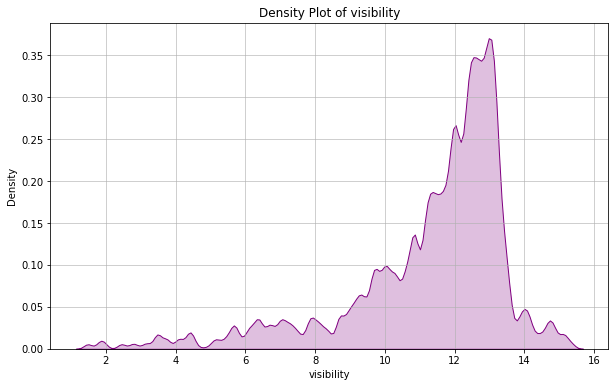

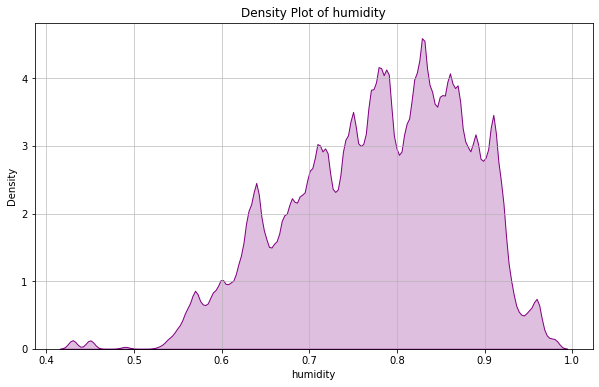

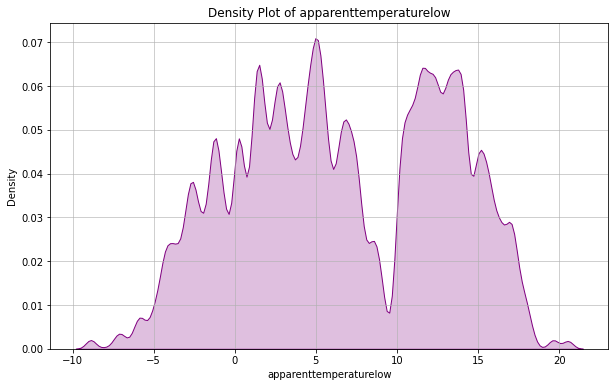

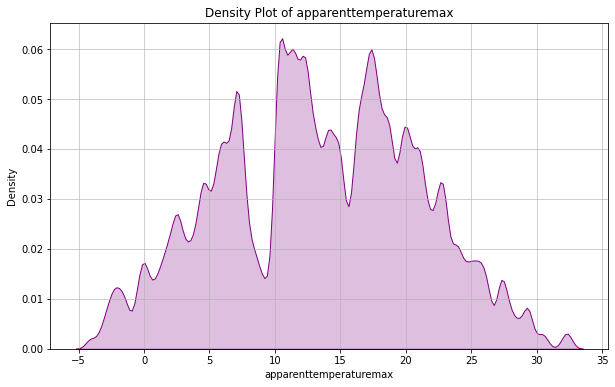

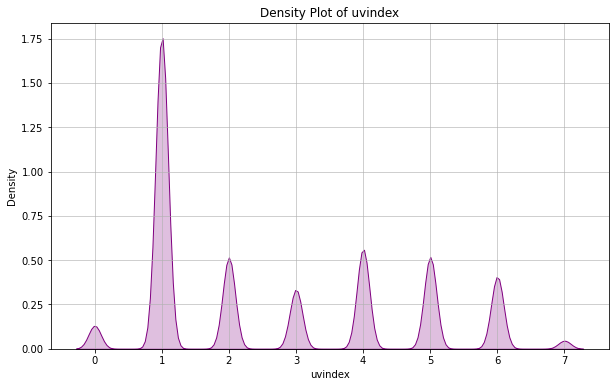

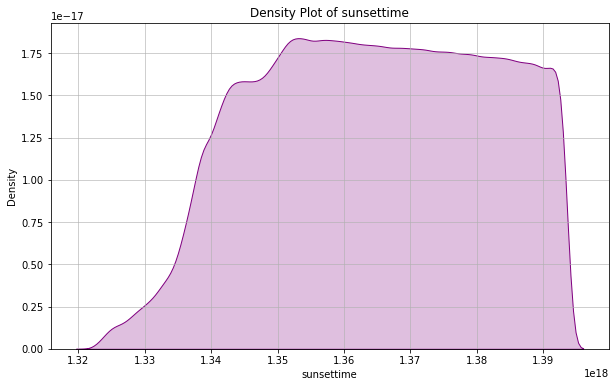

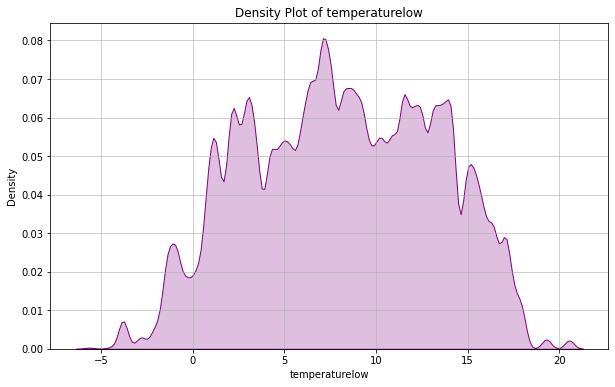

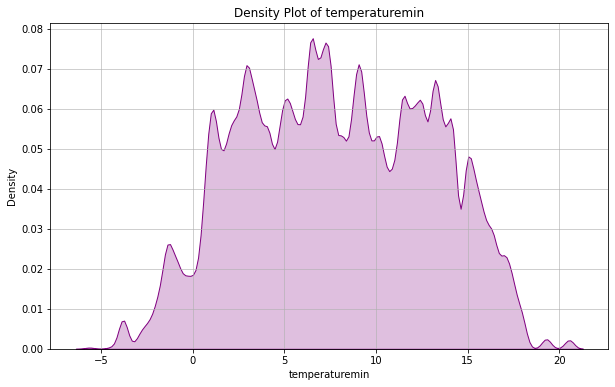

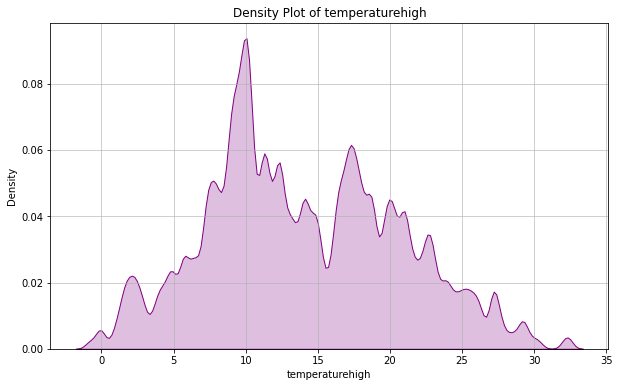

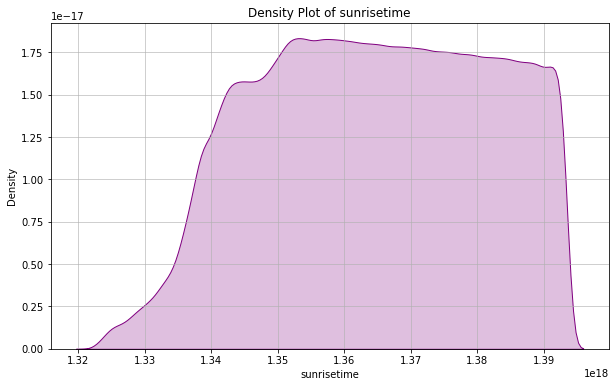

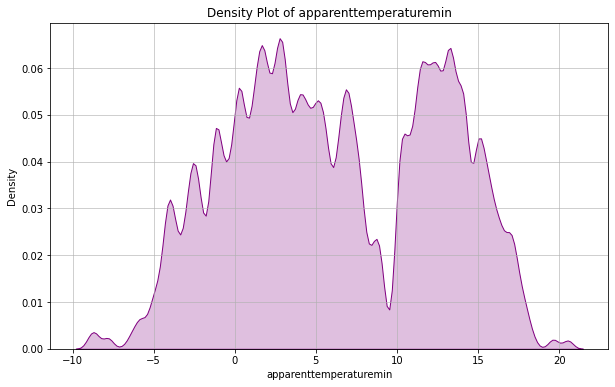

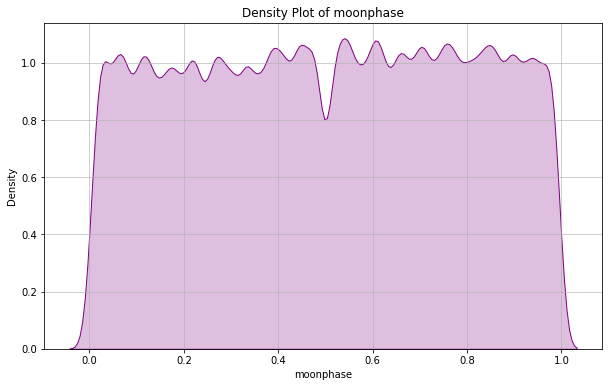

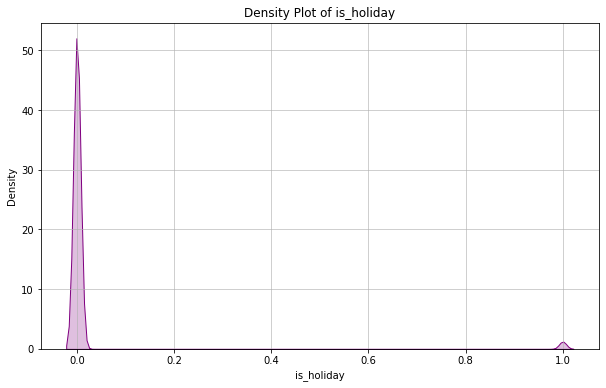

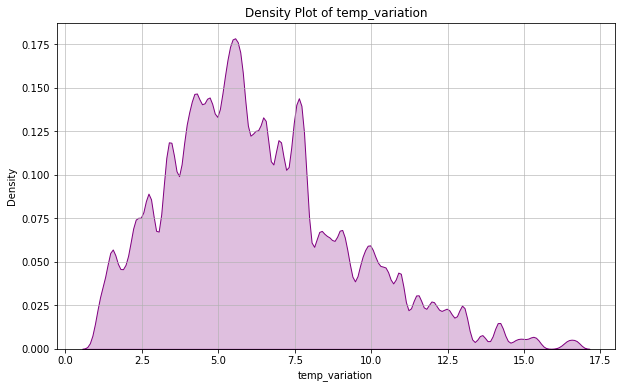

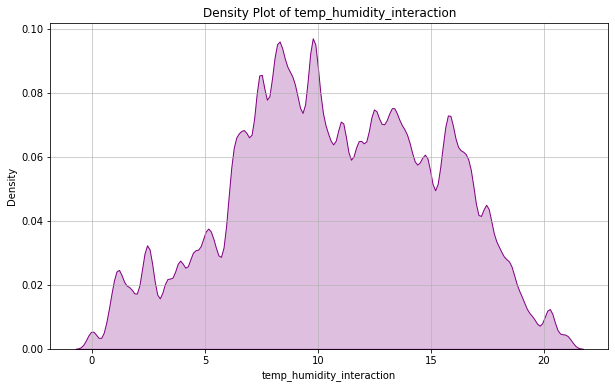

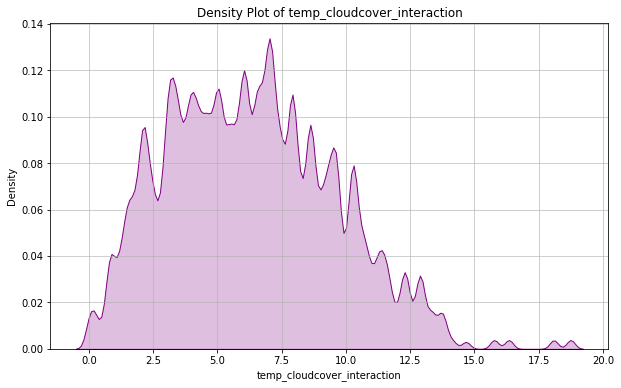

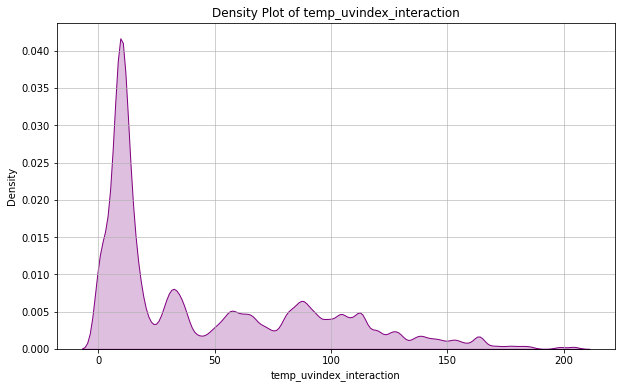

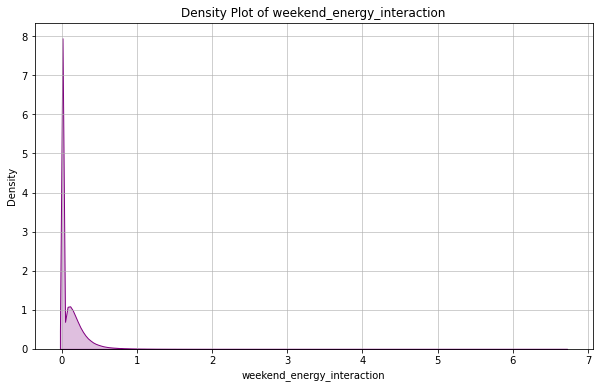

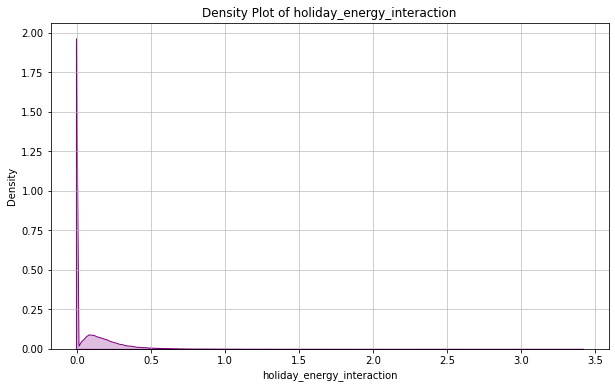

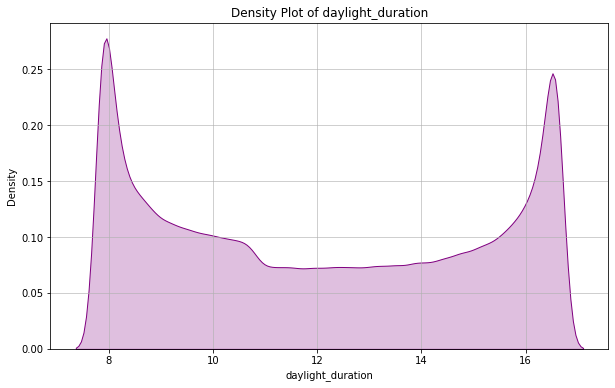

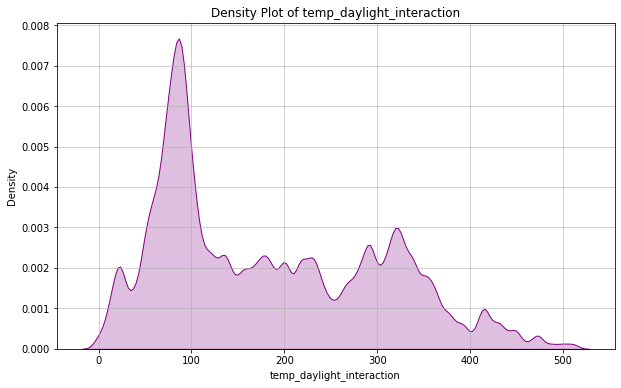

In [11]:
# Density plot for numeric columns
numeric_cols = df.select_dtypes(include=['number'])

for feature in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[feature].dropna(), shade=True, color='purple')
    plt.title(f'Density Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.grid(alpha=0.75)
    plt.show()

Insights:
- Since moonPhase is uniformly distributed, it may not have a strong predictive relationship with energy_mean 
- holiday_energy_interaction has minimal variability
- uvIndex has a discrete multimodal distribution. Most days have low UV exposure (uvIndex = 1). 
- Days with higher UV index values might correlate with clear weather and higher temperatures, which could indirectly impact energy consumption (e.g., increased cooling needs).

### 2b. Correlation Matrix for Numeric Variables

In [ ]:
# Correlation Matrix
plt.figure(figsize=(18, 14)) 

corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='black', cbar_kws={'shrink': 0.6}, xticklabels=True, yticklabels=True)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Sorted Correlation Matrix
plt.figure(figsize=(18, 14)) 

# Sort features by their correlation with the target variable (e.g., 'energy_mean')
corr = numeric_cols.corr()
sorted_corr = corr.sort_values(by='energy_mean', axis=1).sort_values(by='energy_mean', axis=0)
sns.heatmap(sorted_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='black', cbar_kws={'shrink': 0.6}, xticklabels=True, yticklabels=True)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

plt.title("Sorted Correlation Heatmap")
plt.show()

Target: energy_mean (exclude energy-related variables)

Insights: 

1. Include High-Correlation Features:
- weekend_energy_interaction (correlation = 0.41)

2. Exclude Weak or Negligible Correlations
- windSpeed (correlation 0.03)
- is_weekend (correlation 0.02)
- is_holiday (correlation 0.01)
- moonPhase (correlation -0.01)
- windBearing (correlation -0.01)

3. Handle Multicollinearity:
- Temperature-related features are highly inter-correlated (e.g., temperatureMax, apparentTemperatureMax) --> Redundancy inflates model complexity

Conclusion:
- **Exclude windSpeed, is_weekend, is_holiday, moonPhase, windBearing**
- Use Random Forest feature importance analysis to identify which ones to keep.

## 3. Feature Importance 

Run Random Forest model with a subset of features and analyze feature_importances_. 

This is done on *q2-ml-forest-feature-importance.py* on AWS EMR.